In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def prob(b, p, N_t):
    P = 2.**p
    theta = np.arcsin(np.sqrt(float(N_t)))
    x = (theta/np.pi)-(b/P)
    out = (np.sinc(P*x)/np.sinc(x))**2
    return out/np.sum(out)

In [3]:
p=6
N=2**5
t=1
N_t=float(t)/N
print(N_t)

0.03125


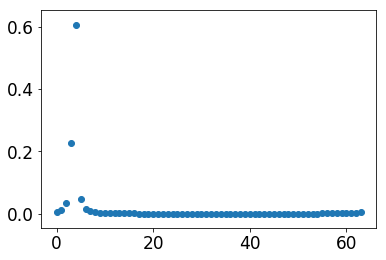

In [4]:
#bs = np.linspace(0,2**(p),1000)
bs = np.arange(2**p)
plt.scatter(bs,prob(bs,p,N_t))
plt.show()

In [5]:
print(np.sum(prob(bs,p,N_t)))

1.0


In [6]:
def var_prob(x, paras, prob_func):
    p, N_t = paras
    factor = 1.#/(2**p)
    return np.sum(prob_func(x,*paras)*(x*factor)**2) - np.sum(prob_func(x,*paras)*x*factor)**2

In [7]:
print(var_prob(np.arange(2**p), [p,N_t], prob))

62.07890704721122


In [8]:
ps = np.arange(3,7)
N_ts = np.logspace(-8,-1,2000)

In [9]:
b_vars = []

for p_ in ps:
    ps_ = np.arange(2**(p_-1))
    b_vars.append([])
    for N_t_ in N_ts:
        N_ts
        var_ = var_prob(ps_, [p_,N_t_], prob)
        #print(p_,N_t_,var_)
        b_vars[-1].append(var_)
    b_vars[-1]=np.array(b_vars[-1])
b_vars = np.array(b_vars)

In [10]:
print(b_vars.shape)

(4, 2000)


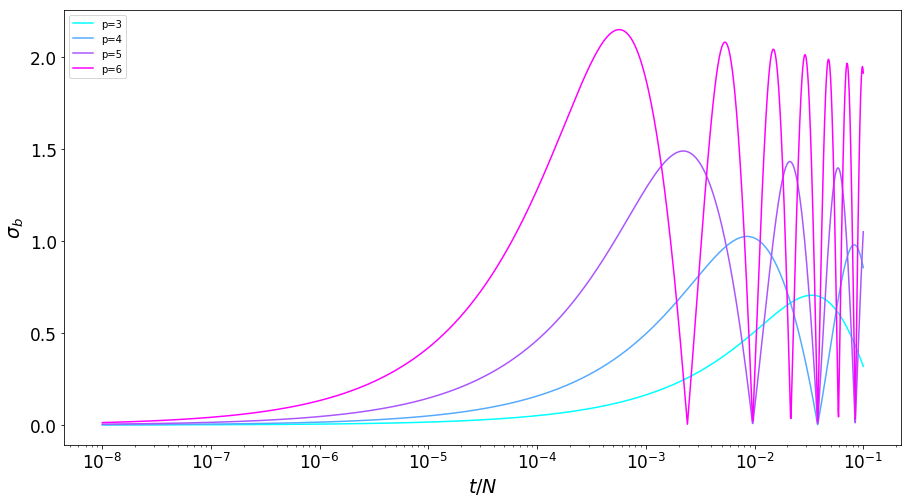

In [11]:
colors = iter(cm.cool(np.linspace(0,1,len(ps))))

fig = plt.figure(figsize=(15,8))
ax = fig.gca()

for i,p in enumerate(ps):
    c = next(colors)
    ax.plot(N_ts, np.sqrt(b_vars[i].squeeze()), c=c, label='p='+str(p))
ax.set_xlabel(r'$t/N$')
ax.set_ylabel(r'$\sigma_{b}$')
ax.legend()
ax.set_xscale('log')
plt.savefig('whole_range_of_p.png')
plt.show()

In [12]:
b_vars2 = []

for p_ in ps:
    #ps_ = np.arange(2**p_)
    b_vars2.append([])
    for N_t_ in N_ts:
        bt = int((2**p_)*np.arcsin(np.sqrt(N_t_))/np.pi)
        bt_max=bt+1
        if bt==0:
            bt_min=0
            bt_max=bt+2
        else:
            bt_min=bt-1
        ps_ = np.arange(bt_max)
        var2_ = var_prob(ps_, [p_,N_t_], prob)
        #print(p_,N_t_,var_)
        b_vars2[-1].append(var2_)
    b_vars2[-1]=np.array(b_vars2[-1])
b_vars2 = np.array(b_vars2)

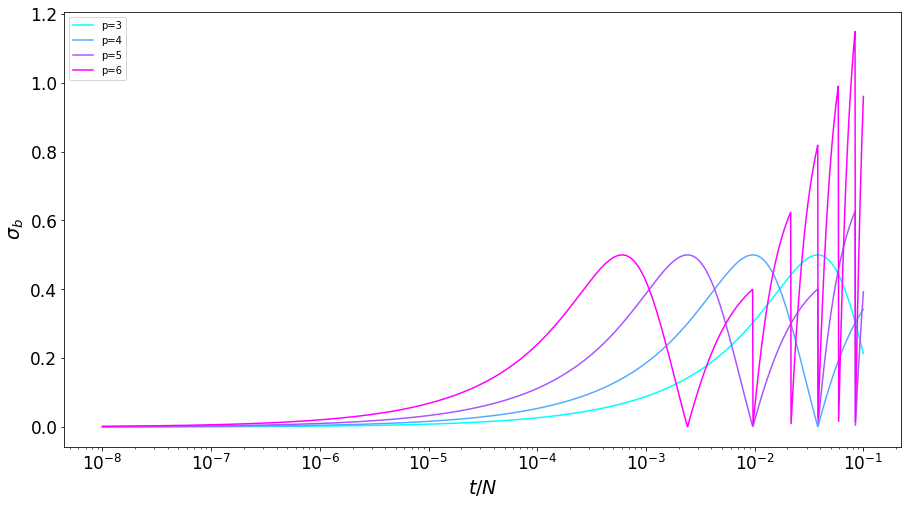

In [13]:
colors = iter(cm.cool(np.linspace(0,1,len(ps))))

fig = plt.figure(figsize=(15,8))
ax = fig.gca()

for i,p in enumerate(ps):
    c = next(colors)
    ax.plot(N_ts, np.sqrt(b_vars2[i].squeeze()), c=c, label='p='+str(p))
ax.set_xlabel(r'$t/N$')
ax.set_ylabel(r'$\sigma_{b}$')
ax.set_xscale('log')
ax.legend()
plt.show()

In [14]:
b_vars3 = []

for p_ in ps:
    #ps_ = np.arange(2**p_)
    ps_ = np.arange(2**(p_-1))
    b_vars3.append([])
    for N_t_ in N_ts:
        var3_ = var_prob(ps_, [p_,N_t_], prob)
        #print(p_,N_t_,var_)
        b_vars3[-1].append(var3_)
    b_vars3[-1]=np.array(b_vars3[-1])
b_vars3 = np.array(b_vars3)

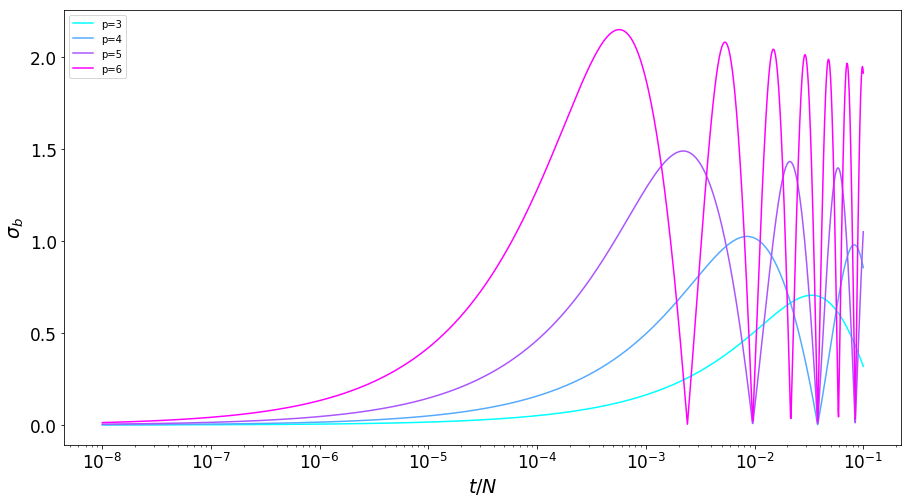

In [15]:
colors = iter(cm.cool(np.linspace(0,1,len(ps))))

fig = plt.figure(figsize=(15,8))
ax = fig.gca()

for i,p in enumerate(ps):
    c = next(colors)
    ax.plot(N_ts, np.sqrt(b_vars3[i].squeeze()), c=c, label='p='+str(p))
ax.set_xlabel(r'$t/N$')
ax.set_ylabel(r'$\sigma_{b}$')
ax.set_xscale('log')
ax.legend()
plt.savefig('half_range_of_p.png')
plt.show()